!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [24]:
import tensorflow as tf
import os

In [25]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [26]:
tf.config.list_physical_devices('GPU')

[]

Clear dataset images

In [27]:
import cv2
import imghdr

In [31]:
data_dir = '/home/cody/Code/Python/ML/cnn_model/dataset/cats'

Checking for rust

In [ ]:
#  no clear)))

Load data

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('/home/cody/Code/Python/ML/cnn_model/dataset/') # RESIZE AND CLEAR

Found 341 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

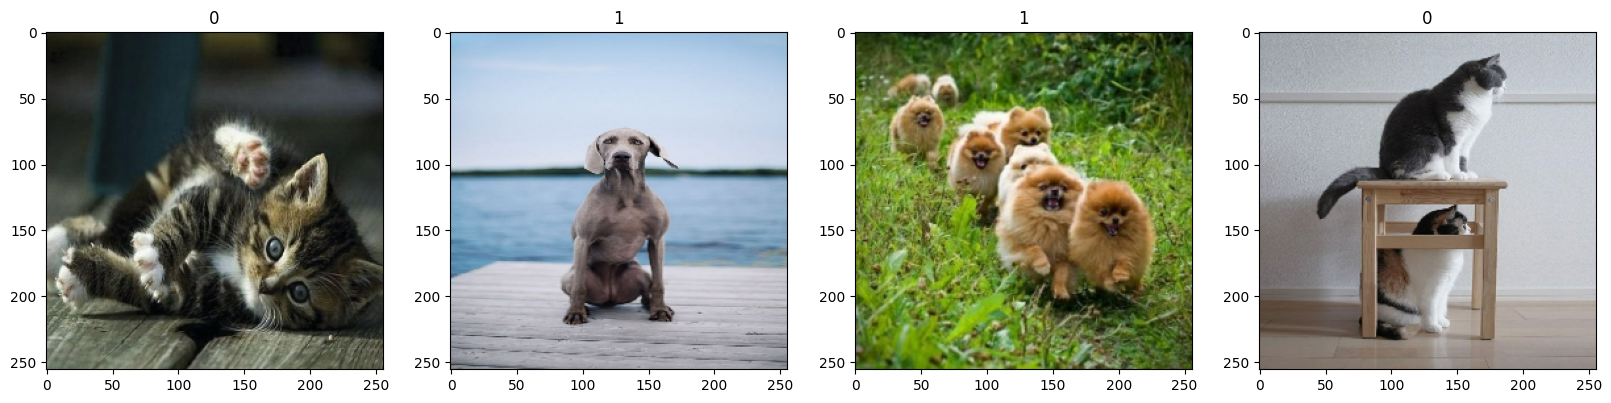

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[7.2961855e-01, 8.0731463e-01, 9.1687346e-01],
          [6.8468904e-01, 7.7709097e-01, 9.1483611e-01],
          [6.3816160e-01, 7.5164199e-01, 9.1585767e-01],
          ...,
          [8.4078103e-01, 8.4004575e-01, 8.0492014e-01],
          [8.5152417e-01, 8.3289820e-01, 8.0831033e-01],
          [8.6465180e-01, 8.3311218e-01, 8.1419271e-01]],
 
         [[6.7939645e-01, 7.6546270e-01, 8.6020505e-01],
          [6.5049022e-01, 7.5294119e-01, 8.7058824e-01],
          [6.3799882e-01, 7.5533134e-01, 8.9830828e-01],
          ...,
          [7.4713731e-01, 7.4487734e-01, 6.7724562e-01],
          [7.4260014e-01, 7.3021072e-01, 6.7080176e-01],
          [7.5991118e-01, 7.3638177e-01, 6.8223041e-01]],
 
         [[6.8116337e-01, 7.5676078e-01, 8.2451504e-01],
          [6.6276139e-01, 7.4669212e-01, 8.4142154e-01],
          [6.4414304e-01, 7.3883849e-01, 8.4920585e-01],
          ...,
          [6.6984195e-01, 6.3901317e-01, 5.6504720e-01],
          [6.7637914e-01, 6.4555043e-

In [42]:
len(data)

11

In [44]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size, val_size, test_size

(7, 2, 1)

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

DEEP learning model

In [47]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [48]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/cody/Code/Python/ML/cnn_model/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
logdir='/home/cody/Code/Python/ML/cnn_model/log'

In [54]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)